In [202]:
import pandas as pd

# URL of the dataset on GitHub (make sure to use the raw version of the file)
url1 = 'https://raw.githubusercontent.com/NumEconCopenhagen/projects-2024-frederik/main/dataproject/Alle-uanset-formuetype.xlsx'

# Read the Excel file directly into a pandas DataFrame
averageall = pd.read_excel(url1)

# Display the first few rows of the DataFrame
print(averageall.head())



                       Enhed                           Type             By  \
0  Median (nominelle priser)  A.1. Helårsbolig, Ejerboliger      København   
1  Median (nominelle priser)  A.1. Helårsbolig, Ejerboliger  Frederiksberg   
2  Median (nominelle priser)  A.1. Helårsbolig, Ejerboliger        Brøndby   
3  Median (nominelle priser)  A.1. Helårsbolig, Ejerboliger          Ishøj   
4  Median (nominelle priser)  A.1. Helårsbolig, Ejerboliger   Guldborgsund   

  2014 2015 2016 2017 2018 2019  2020  2021  2022  
0    0    0    0    0    0    0     0     0     0  
1    0    0    0    0    0    0     0     0     0  
2    0    0    0    0    0    0     0     0     0  
3    0    0    0    0    0    0     0     0     0  
4    0    0    0    0    0    0     0     0     0  


In [203]:
# URL of the dataset on GitHub (make sure to use the raw version of the file)
url2 = 'https://raw.githubusercontent.com/NumEconCopenhagen/projects-2024-frederik/main/dataproject/Antal-personer-i-alt_uasnet-formue.xlsx'

# Read the Excel file directly into a pandas DataFrame
pop = pd.read_excel(url2)

# Display the first few rows of the DataFrame
print(pop.head())


                            Type             By    2014    2015    2016  \
0  A.1. Helårsbolig, Ejerboliger      København  477942  487903  496596   
1  A.1. Helårsbolig, Ejerboliger  Frederiksberg   85124   86215   86528   
2  A.1. Helårsbolig, Ejerboliger        Brøndby   27726   27961   28140   
3  A.1. Helårsbolig, Ejerboliger          Ishøj   16987   17253   17561   
4  A.1. Helårsbolig, Ejerboliger   Guldborgsund   50000   50230   50437   

     2017    2018    2019    2020    2021    2022  
0  505518  514068  521518  527190  533918  542829  
1   85986   85582   85973   85614   85836   86984  
2   28108   27979   27774   27888   28237   29494  
3   17813   17831   17899   18047   18173   18383  
4   50468   50391   50351   50108   50147   50129  


In [204]:
# URL of the dataset on GitHub (make sure to use the raw version of the file)
url3 = 'https://raw.githubusercontent.com/NumEconCopenhagen/projects-2024-frederik/main/dataproject/Antal-personer-med-fomruetypen.xlsx'

popmedformue = pd.read_excel(url3)

#showing the first line to make sure our code is good
print(popmedformue.head())

print(popmedformue.columns)

                            Type             By   2014   2015   2016   2017  \
0  A.1. Helårsbolig, Ejerboliger      København  70657  73911  77027  79197   
1  A.1. Helårsbolig, Ejerboliger  Frederiksberg  15930  16418  16734  17107   
2  A.1. Helårsbolig, Ejerboliger        Brøndby   7232   7295   7348   7303   
3  A.1. Helårsbolig, Ejerboliger          Ishøj   5588   5653   5697   5747   
4  A.1. Helårsbolig, Ejerboliger   Guldborgsund  24815  24632  24402  24227   

    2018   2019   2020   2021   2022  
0  83135  85460  86872  88110  88835  
1  17348  17540  17723  17854  17920  
2   7379   7425   7489   7526   7526  
3   5809   5883   5883   5921   5906  
4  24123  24061  23986  24113  24056  
Index(['Type', 'By', '2014', '2015', '2016', '2017', '2018', '2019', '2020',
       '2021', '2022'],
      dtype='object')


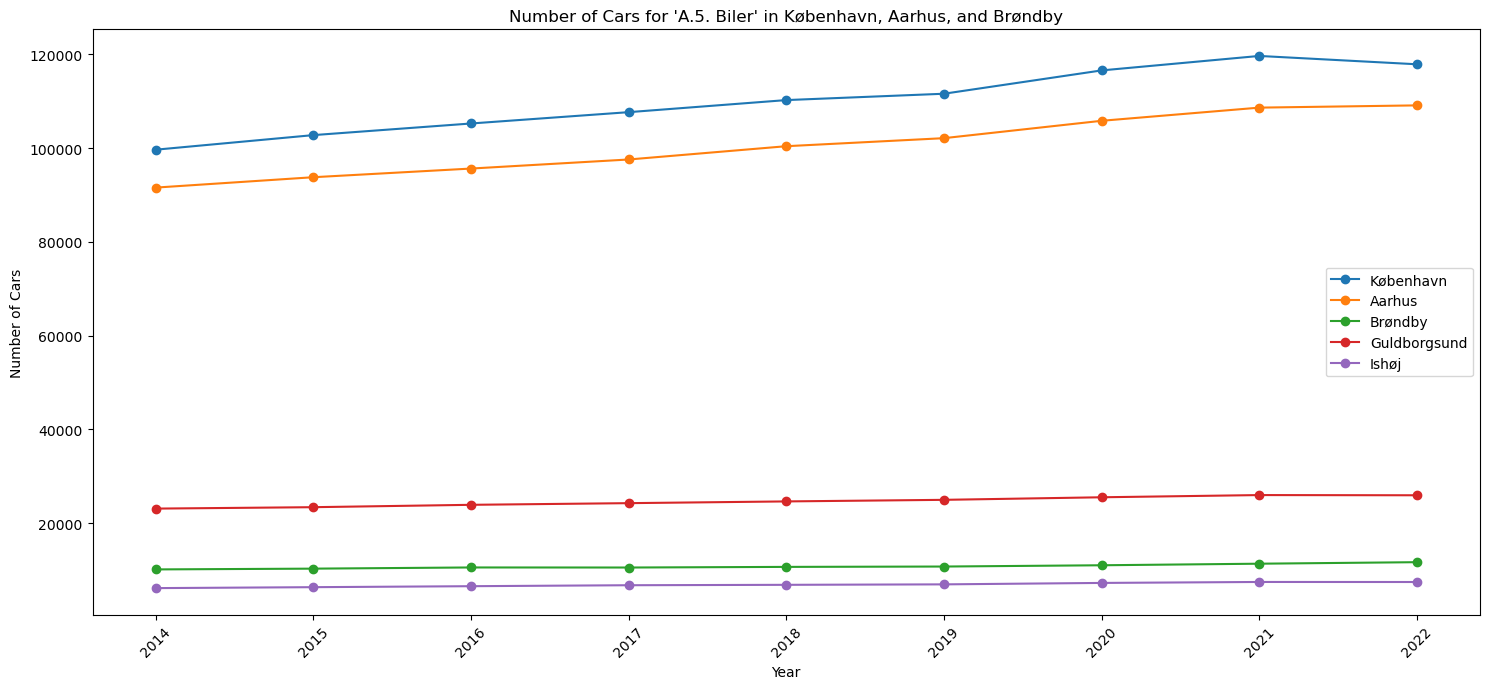

In [205]:
import matplotlib.pyplot as plt

# Specific filters
specific_type = 'A.5. Biler'
specific_cities = ['København', 'Aarhus', 'Brøndby', 'Guldborgsund', 'Ishøj']

# Filter the data
filtered_data = popmedformue[
    (popmedformue['Type'] == specific_type)
]

# Prepare the plot
plt.figure(figsize=(15, 7))

# Plot the data for each city
for city in specific_cities:
    city_data = filtered_data[filtered_data['By'] == city]
    # Assuming the years are the columns '2014' to '2022' in the DataFrame
    years = city_data.columns[2:100]  # We use column index 2 to 100 so that the code can be updated with more years 
    values = city_data.iloc[0, 2:100].astype(float)  # We use column index 2 to 100 so that the code can be updated with more years
    plt.plot(years, values, marker='o', label=city)

# Configure the plot
plt.title("Number of Cars for 'A.5. Biler' in København, Aarhus, and Brøndby")
plt.xlabel('Year')
plt.ylabel('Number of Cars')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()






København: 88835 cars, 542829 people, ratio: 16.36519051119229%
Aarhus: 93340 cars, 297124 people, ratio: 31.414493612094613%
Brøndby: 7526 cars, 29494 people, ratio: 25.517054316132093%
Guldborgsund: 24056 cars, 50129 people, ratio: 47.988190468591036%
Ishøj: 5906 cars, 18383 people, ratio: 32.12750911167927%


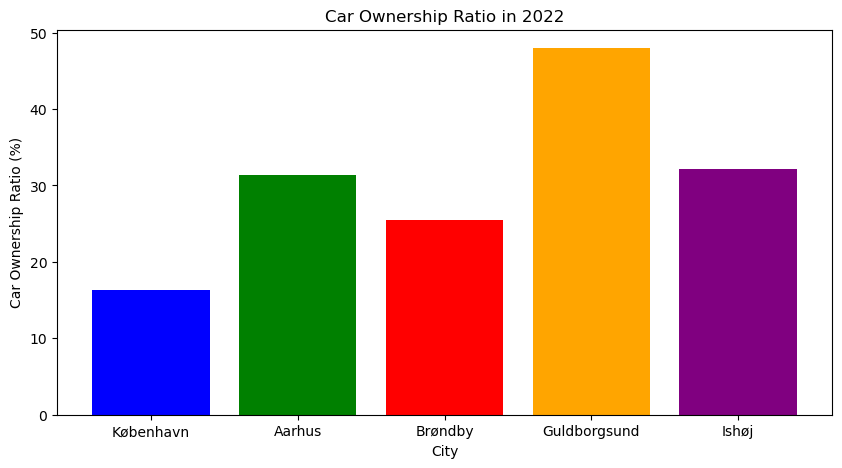

In [206]:
import matplotlib.pyplot as plt

# Assuming popmedformue is the DataFrame with car data and 'pop' is the DataFrame with population data.

# Define the cities and year of interest
specific_cities = ['København', 'Aarhus', 'Brøndby', 'Guldborgsund', 'Ishøj']
year = '2022'

# Check that the data is present for the specific type and cities in both DataFrames
car_data_exists = all(city in popmedformue['By'].values for city in specific_cities)
pop_data_exists = all(city in pop['By'].values for city in specific_cities)

# If data exists, proceed with the merge
if car_data_exists and pop_data_exists:
    # Merge the two datasets on the 'By' column for the year 2022
    merged_data = pd.merge(
        popmedformue[['By', year]],
        pop[['By', year]],
        on='By',
        suffixes=('_cars', '_pop')
    )
    
    # Calculate the car ownership ratios for each city
    car_ownership_ratios = {}
    for city in specific_cities:
        city_data = merged_data[merged_data['By'] == city]
        if not city_data.empty:
            num_cars = city_data[year + '_cars'].iloc[0]
            population = city_data[year + '_pop'].iloc[0]
            car_ownership_ratios[city] = (num_cars / population) * 100  # Convert to percentage
            print(f"{city}: {num_cars} cars, {population} people, ratio: {car_ownership_ratios[city]}%")
        else:
            print(f"No data for {city}")
    
    # Plot the ratios if we have them
    if car_ownership_ratios:
        plt.figure(figsize=(10, 5))
        plt.bar(car_ownership_ratios.keys(), car_ownership_ratios.values(), color=['blue', 'green', 'red', 'orange', 'purple'])
        plt.title('Car Ownership Ratio in 2022')
        plt.xlabel('City')
        plt.ylabel('Car Ownership Ratio (%)')
        plt.show()
    else:
        print("No ratios to plot.")
else:
    print("Car data or population data is missing for the specified cities.")


In [207]:
for city in specific_cities:
    car_rows = popmedformue.loc[(popmedformue['By'] == city) & (popmedformue['Type'] == "A.5. Biler"), year]
    pop_rows = pop.loc[(pop['By'] == city) & (pop['Type'] == "Personer i befolkningen d. 31.12 (antal)"), year]
    
    if not car_rows.empty and not pop_rows.empty:
        num_cars = car_rows.values[0]
        population = pop_rows.values[0]
        ratios[city] = (num_cars / population) * 100  # Convert to percentage
    else:
        print(f"Data not found for {city}. Cars: {car_rows}, Population: {pop_rows}")


Data not found for København. Cars: 10    117861
Name: 2022, dtype: int64, Population: Series([], Name: 2022, dtype: int64)
Data not found for Aarhus. Cars: 17    109094
Name: 2022, dtype: int64, Population: Series([], Name: 2022, dtype: int64)
Data not found for Brøndby. Cars: 12    11660
Name: 2022, dtype: int64, Population: Series([], Name: 2022, dtype: int64)
Data not found for Guldborgsund. Cars: 14    25932
Name: 2022, dtype: int64, Population: Series([], Name: 2022, dtype: int64)
Data not found for Ishøj. Cars: 13    7431
Name: 2022, dtype: int64, Population: Series([], Name: 2022, dtype: int64)


In [208]:
# URL of the dataset on GitHub (make sure to use the raw version of the file)
url4 = 'https://raw.githubusercontent.com/NumEconCopenhagen/projects-2024-frederik/main/dataproject/Kun-personer-med-formuetype.xlsx'

averagemedformue = pd.read_excel(url4)

#showing the first line to make sure our code is good
print(averagemedformue.head())

                       Enhed                             Type             By  \
0  Median (nominelle priser)  A.2. Helårsbolig, Andelsboliger      København   
1  Median (nominelle priser)  A.2. Helårsbolig, Andelsboliger  Frederiksberg   
2  Median (nominelle priser)  A.2. Helårsbolig, Andelsboliger        Brøndby   
3  Median (nominelle priser)  A.2. Helårsbolig, Andelsboliger          Ishøj   
4  Median (nominelle priser)  A.2. Helårsbolig, Andelsboliger   Guldborgsund   

     2014    2015    2016     2017     2018     2019     2020     2021  \
0  530591  556678  573883   598066   621403   652795   721471   797163   
1  759620  793787  821607   893962   935486   968488  1060696  1162328   
2  530469  563111  580830   603770   630936   644178   709014   784042   
3  907629  956594  989578  1031990  1048026  1078370  1193761  1338436   
4  306248  329976  324933   341701   366146   377318   377087   390178   

      2022  
0   806910  
1  1190391  
2   782087  
3   866401  
4   40693

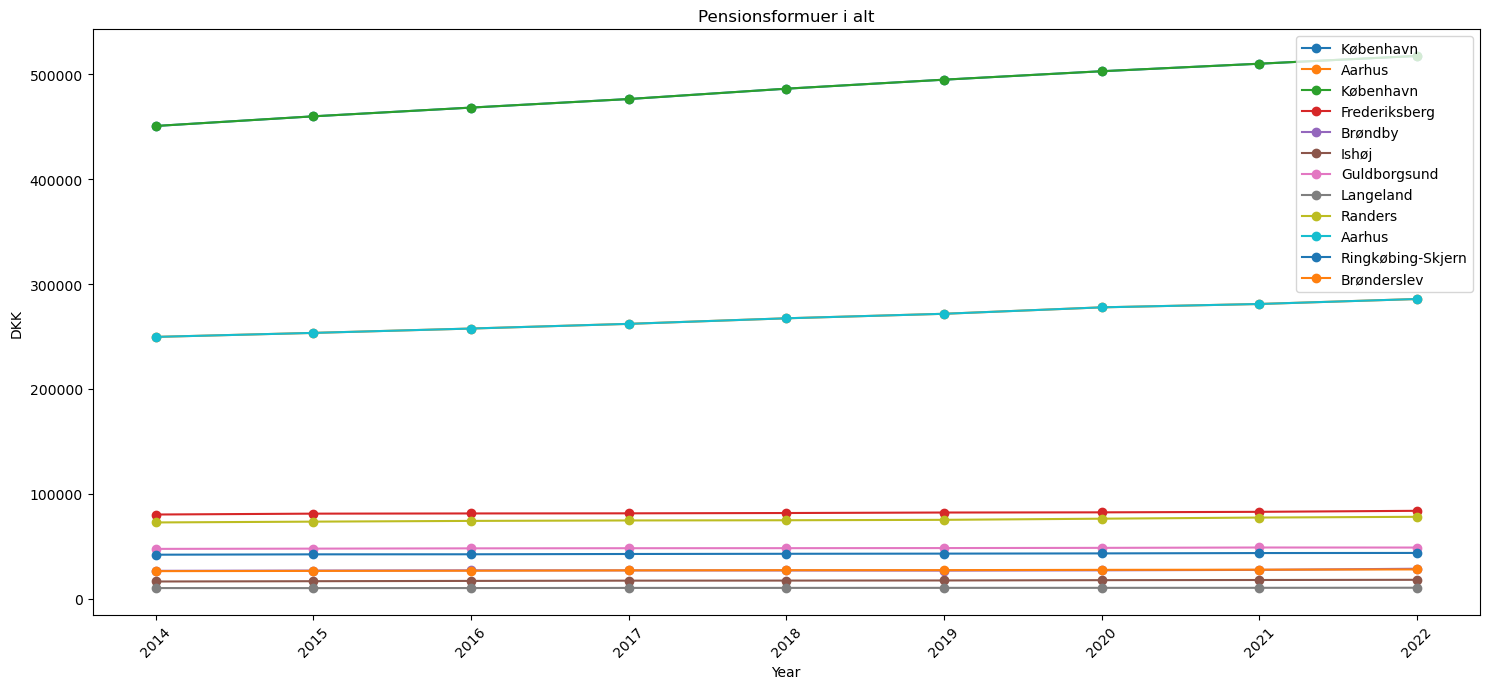

In [209]:
import matplotlib.pyplot as plt

# Specific filters
specific_type = 'C. Pensionsformuer i alt'
specific_cities = ["København", "Aarhus", "København","Frederiksberg","Brøndby","Ishøj","Guldborgsund","Langeland","Randers","Aarhus","Ringkøbing-Skjern"
,"Brønderslev"]

# Filter the data
filtered_data = popmedformue[
    (popmedformue['Type'] == specific_type)
]

# Prepare the plot
plt.figure(figsize=(15, 7))

# Plot the data for each city
for city in specific_cities:
    city_data = filtered_data[filtered_data['By'] == city]
    # Assuming the years are the columns '2014' to '2022' in the DataFrame
    years = city_data.columns[2:100]  # Adjust the column indices as necessary
    values = city_data.iloc[0, 2:100].astype(float)  # Convert to float if not already
    plt.plot(years, values, marker='o', label=city)

# Configure the plot
plt.title("Pensionsformuer i alt")
plt.xlabel('Year')
plt.ylabel('DKK')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [210]:
import pandas as pd



# Define the start year and end year
start_year = '2014'
end_year = '2022'

# Calculate the number of years between the start and end year
n_years = int(end_year) - int(start_year)

# Calculate the AG for each city for 'Pensionsformuer'
ag_by_city = {}
for index, row in averagemedformue.iterrows():
    if 'B. Finansiel formue i alt (2014-definition ekskl. B6)' in row['Type']:
        initial_value = row[start_year]
        final_value = row[end_year]
        # Avoid division by zero if the initial value is 0
        if initial_value > 0:
            ag = (final_value / initial_value) ** (1/n_years) - 1
            ag_by_city[row['By']] = ag

# Display the AG for each city
for city, ag in ag_by_city.items():
    print(f"{city}: {ag:.2%}")

København: 7.50%
Frederiksberg: 5.39%
Brøndby: 4.49%
Ishøj: 4.75%
Guldborgsund: 3.54%
Langeland: 4.65%
Randers: 4.37%
Aarhus: 4.91%
Ringkøbing-Skjern: 4.25%
Brønderslev: 4.35%


In [211]:
# Assuming the header we want to use starts at the second row (index 1, considering 0-indexing)
url5 = 'https://raw.githubusercontent.com/NumEconCopenhagen/projects-2024-frederik/main/dataproject/Money-bank.xlsx'

averageinbank = pd.read_excel(url5)


# Check the DataFrame after the operations
print(averageinbank.head())



                           Enhed                                 Type  \
0  Gennemsnit (nominelle priser)  B.1. Indestående i pengeinstitutter   
1  Gennemsnit (nominelle priser)  B.1. Indestående i pengeinstitutter   
2  Gennemsnit (nominelle priser)  B.1. Indestående i pengeinstitutter   
3  Gennemsnit (nominelle priser)  B.1. Indestående i pengeinstitutter   
4  Gennemsnit (nominelle priser)  B.1. Indestående i pengeinstitutter   

              By    2014    2015    2016    2017    2018    2019    2020  \
0      København  121602  126945  134300  141064  152535  166303  180185   
1  Frederiksberg  191881  198376  208299  220793  238217  252090  262367   
2        Brøndby  111119  114214  118314  124360  131872  138552  148929   
3          Ishøj  100185  100429  105932  111249  116044  123673  137460   
4   Guldborgsund  128770  126450  129440  131143  138864  143621  154928   

     2021    2022  
0  180628  189318  
1  254398  273250  
2  147607  150724  
3  137039  141118  
4  1

In [212]:
# Assuming that 'popmedformue' and 'averagestocks' are your DataFrames
# and they have the same columns

# Skip the first row which contains column names
averagestock = averagestocks.iloc[1:]

# Append the data without the header row to 'averagemedformue'
combined_data = pd.concat([averagemedformue, averageinbank,])


# Now 'combined_data' is a DataFrame that contains all the rows from both 'popmedformue' and 'averagestocks'

print(combined_data.tail())

                           Enhed                                 Type  \
5  Gennemsnit (nominelle priser)  B.1. Indestående i pengeinstitutter   
6  Gennemsnit (nominelle priser)  B.1. Indestående i pengeinstitutter   
7  Gennemsnit (nominelle priser)  B.1. Indestående i pengeinstitutter   
8  Gennemsnit (nominelle priser)  B.1. Indestående i pengeinstitutter   
9  Gennemsnit (nominelle priser)  B.1. Indestående i pengeinstitutter   

                  By    2014    2015    2016    2017    2018    2019    2020  \
5          Langeland  134258  133562  139468  143678  155229  164860  168897   
6            Randers  119815  120581  126583  128717  136559  144094  153157   
7             Aarhus  141013  145439  151434  154590  165958  176626  186831   
8  Ringkøbing-Skjern  152662  151606  158317  163065  168923  178368  184611   
9        Brønderslev  128515  127669  128816  133508  143107  146507  161674   

     2021    2022  
5  167846  177004  
6  153492  158567  
7  183256  189954  


/var/folders/71/zkmf5scx0wsfq_s27yxndrww0000gn/T/ipykernel_73231/1555317086.py:46: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(years, rotation=45)
/var/folders/71/zkmf5scx0wsfq_s27yxndrww0000gn/T/ipykernel_73231/1555317086.py:46: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(years, rotation=45)
/var/folders/71/zkmf5scx0wsfq_s27yxndrww0000gn/T/ipykernel_73231/1555317086.py:46: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(years, rotation=45)
/var/folders/71/zkmf5scx0wsfq_s27yxndrww0000gn/T/ipykernel_73231/1555317086.py:46: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(years, rotat

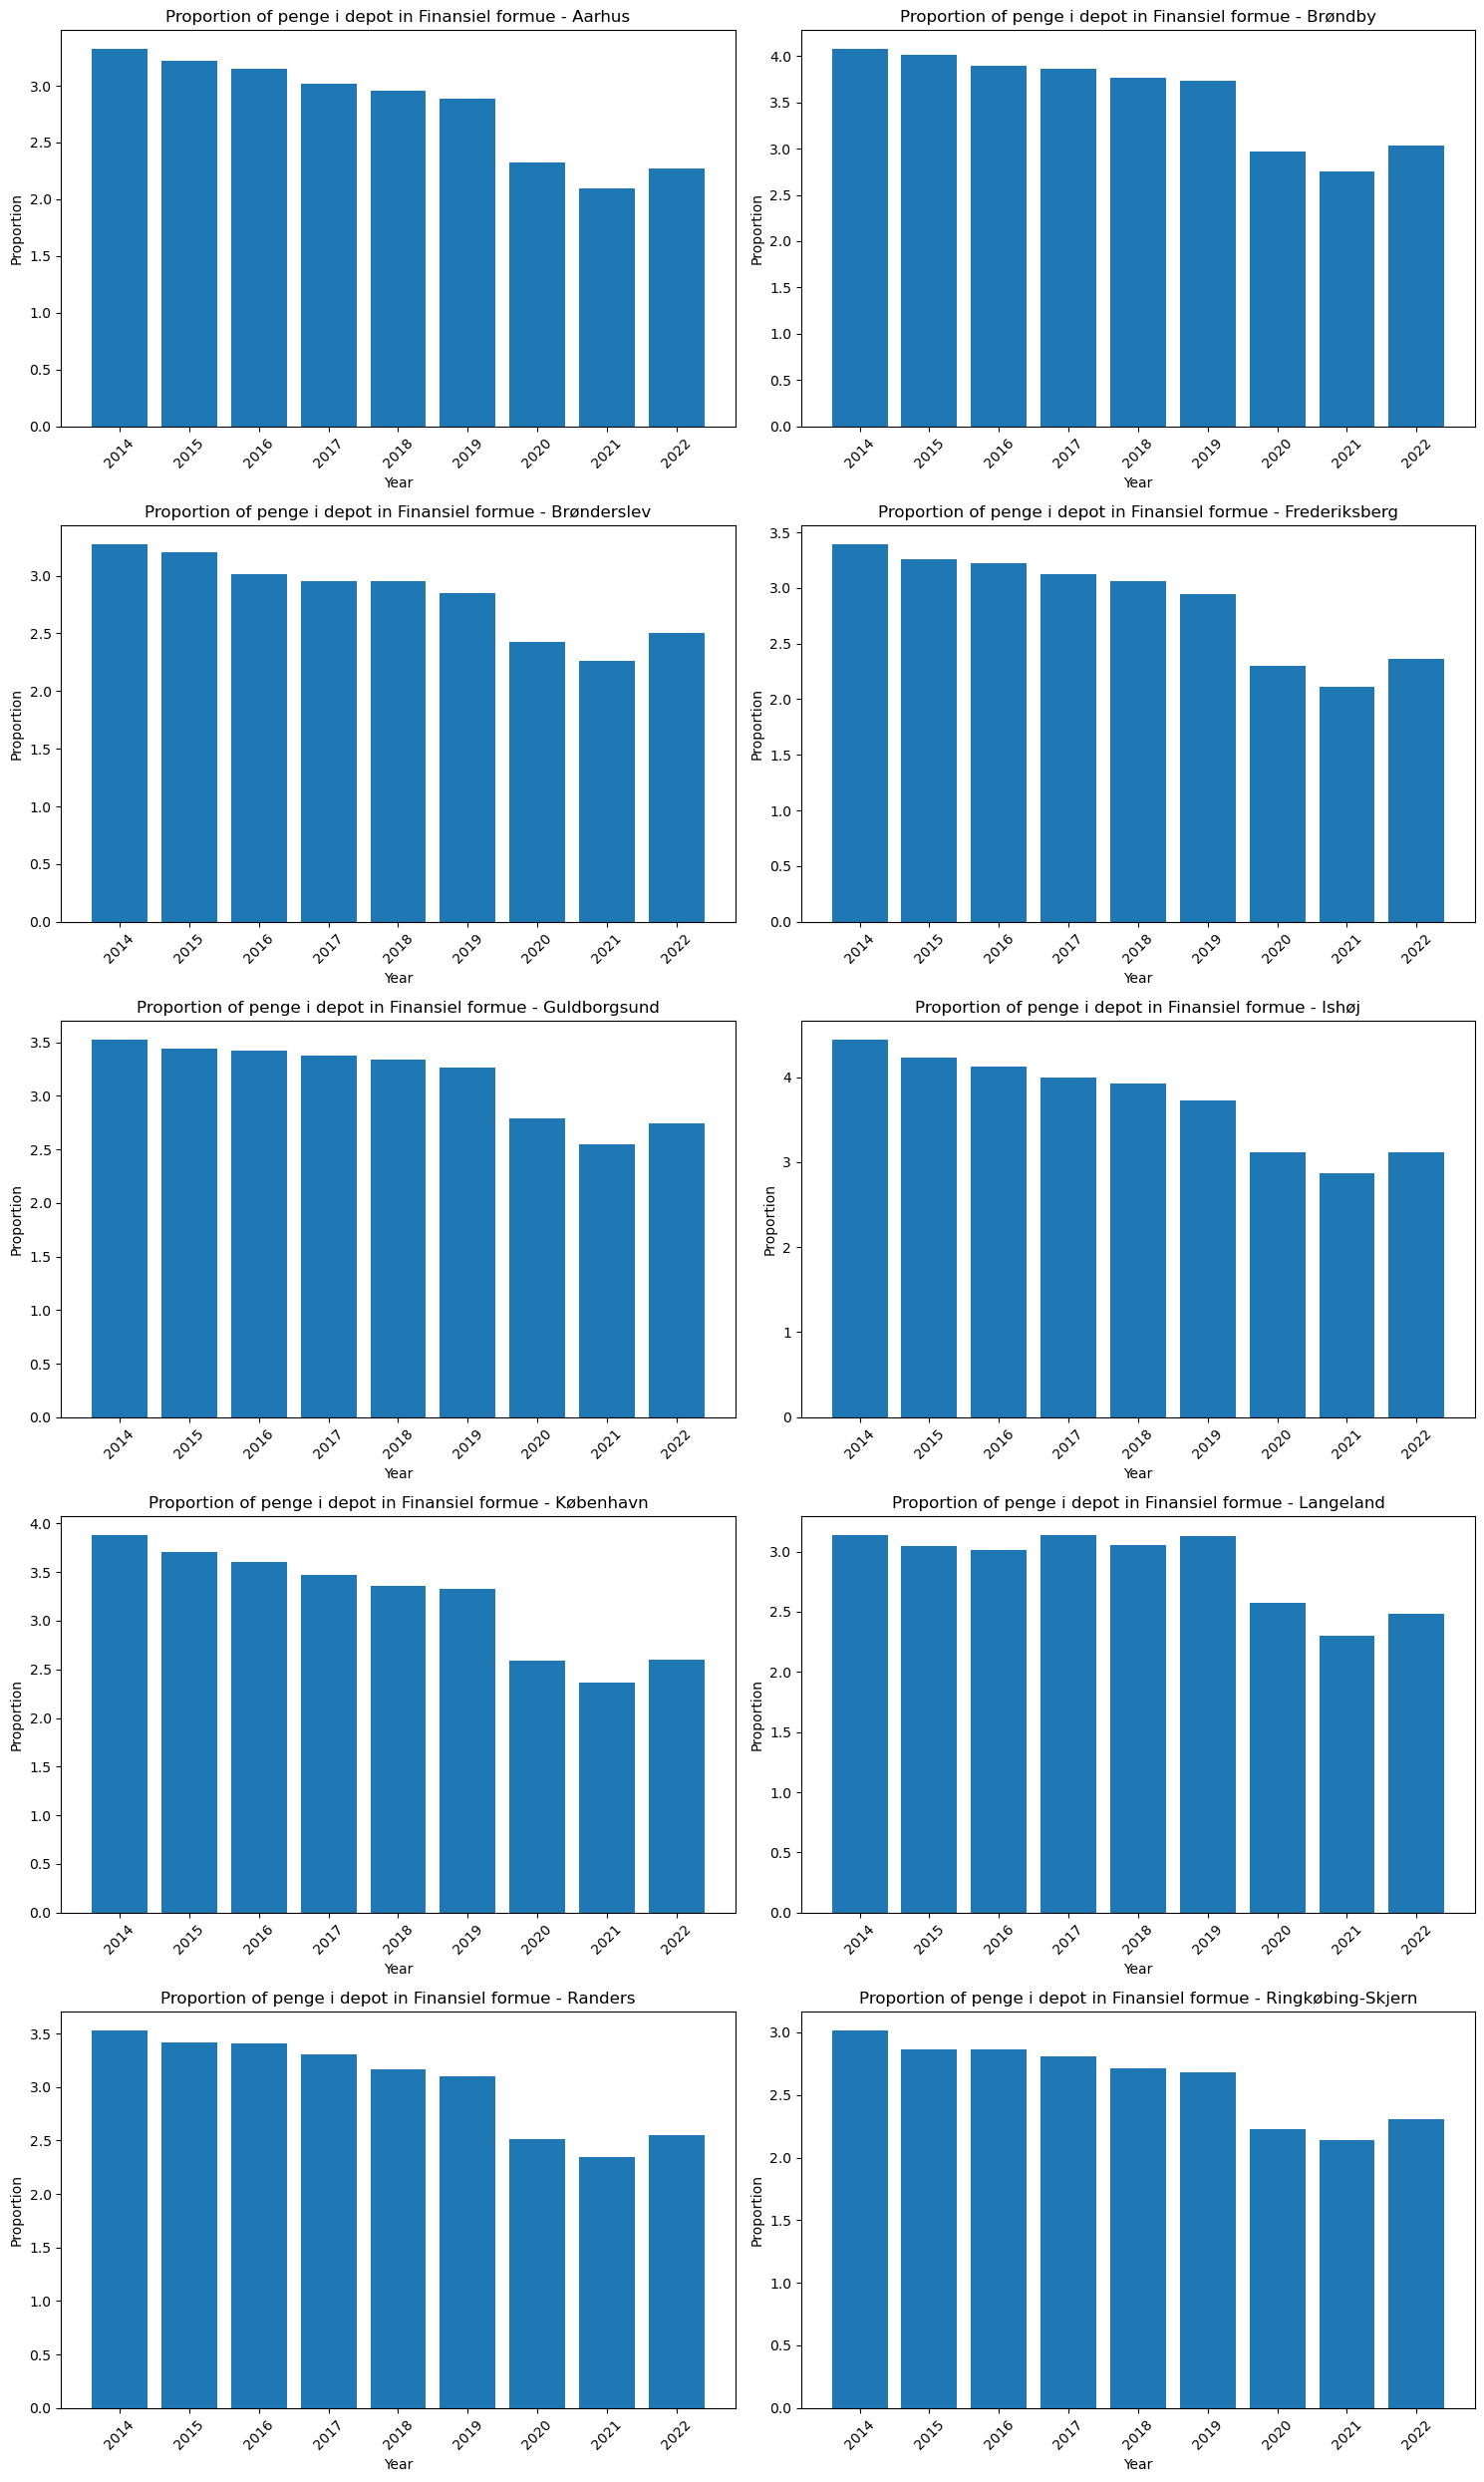

In [216]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'combined_data' is your DataFrame which contains the data

# Melt the DataFrame to have 'Year', 'City', and 'Value' columns
combined_data_long = pd.melt(combined_data, id_vars=['Enhed', 'Type', 'By'], 
                             var_name='Year', value_name='Value')

# Filter the DataFrame for the two types
finansiel_formue = combined_data_long[combined_data_long['Type'] == 'B. Finansiel formue i alt (2014-definition ekskl. B6)']
bank_i_depot = combined_data_long[combined_data_long['Type'] == 'B.1. Indestående i pengeinstitutter']

# Merge the datasets on 'By' and 'Year'
combined_financial_data = pd.merge(finansiel_formue, bank_i_depot, on=['By', 'Year'], suffixes=('_finansiel', '_bank'))

# Calculate the proportion of 'Aktier i depot' in 'Finansiel formue'
combined_financial_data['Proportion'] = combined_financial_data['Value_bank'] / combined_financial_data['Value_finansiel']

# Sorting the data might be beneficial for plotting
combined_financial_data.sort_values(by=['By', 'Year'], inplace=True)

# Plotting
# Create a figure and a set of subplots
cities = combined_financial_data['By'].unique()
years = sorted(combined_financial_data['Year'].unique())

# Calculate the number of subplot rows needed, with two plots per row
num_rows = int(np.ceil(len(cities) / 2))

# Set up the matplotlib figure
fig, axs = plt.subplots(num_rows, 2, figsize=(15, num_rows * 5), constrained_layout=True)

# Flatten the array of axes for easy iteration
axs = axs.flatten()

# Iterate through the cities and plot on individual subplots
for i, city in enumerate(cities):
    city_data = combined_financial_data[combined_financial_data['By'] == city]
    ax = axs[i]  # Choose the subplot to plot on
    ax.bar(city_data['Year'], city_data['Proportion'], label=city)
    ax.set_title(f"Proportion of penge i depot in Finansiel formue - {city}")
    ax.set_xlabel('Year')
    ax.set_ylabel('Proportion')
    ax.set_xticklabels(years, rotation=45)

# Hide unused subplots if the number of cities is odd
if len(cities) % 2 != 0:
    axs[-1].set_visible(False)

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()









In [221]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'combined_data' is your DataFrame and it's correctly formatted

# Convert columns to the correct data type
combined_data.iloc[:, 3:] = combined_data.iloc[:, 3:].apply(pd.to_numeric, errors='coerce')

# Separate the deposits and financial assets into two DataFrames
deposits_data = combined_data[combined_data['Type'] == 'B.1. Indestående i pengeinstitutter'].copy()
financial_assets_data = combined_data[combined_data['Type'] == 'B. Finansiel formue i alt (2014-definition ekskl. B6)'].copy()

# Drop the 'Type' column as it's no longer needed
deposits_data.drop('Type', axis=1, inplace=True)
financial_assets_data.drop('Type', axis=1, inplace=True)

# Rename the value columns in each DataFrame for clarity
deposits_data.rename(columns=lambda x: x + '_deposits' if x not in ['Enhed', 'By'] else x, inplace=True)
financial_assets_data.rename(columns=lambda x: x + '_financial_assets' if x not in ['Enhed', 'By'] else x, inplace=True)

# Merge the two DataFrames on 'By' and 'Enhed' (which should be consistent across both)
merged_data = pd.merge(deposits_data, financial_assets_data, on=['Enhed', 'By'])

# Now we melt the merged DataFrame to have 'Year', 'City', and 'Value' columns for each category
melted_data = pd.melt(merged_data, id_vars=['Enhed', 'By'], var_name='Year_Type', value_name='Value')

# Separate 'Year' and 'Type' into two columns
melted_data[['Year', 'Category']] = melted_data['Year_Type'].str.rsplit('_', n=1, expand=True)

# Drop the original 'Year_Type' column as it's no longer needed
melted_data.drop('Year_Type', axis=1, inplace=True)

# Pivot table to have 'Year' as the index and separate columns for each category
pivot_table = melted_data.pivot_table(index=['Enhed', 'By', 'Year'], columns='Category', values='Value', aggfunc='sum')

# Calculate the proportion
pivot_table['Proportion'] = pivot_table['deposits'] / pivot_table['financial_assets']

# Reset the index to convert back to a DataFrame from a pivot table
final_data = pivot_table.reset_index()

# Sorting the data might be beneficial for plotting
final_data.sort_values(by=['By', 'Year'], inplace=True)

# Plotting each city's proportion over the years
# We will plot one chart with all cities, where each line represents a city
plt.figure(figsize=(14, 7))

for city in final_data['By'].unique():
    city_data = final_data[final_data['By'] == city]
    plt.plot(city_data['Year'], city_data['Proportion'], label=city)

plt.title('Proportion of Deposits in Financial Assets by City and Year')
plt.xlabel('Year')
plt.ylabel('Proportion')
plt.legend(title='City')
plt.show()



KeyError: 'financial_assets'